In [333]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [334]:
df = pd.read_csv("covid_19_prediction/data/covid19.csv", index_col=0, sep=",")
df.head(10)

,dayFromStart,day,month,LJ regija,po regija,kr regija,ce regija,foreign regija,nm regija,kk regija,...,age 55-64 MEN,age 65-74,age 65-74 FEMALE,age 65-74 MEN,age 75-84,age 75-84 FEMALE,age 75-84 MEN,age 85+,age 85+ FEMALE,age 85+ MEN
year,,,,,,,,,,,,,,,,,,,,,
2020,1,4,3,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,2,5,3,5,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020,3,6,3,7,NaN,NaN,NaN,NaN,1.0,NaN,...,3,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020,4,7,3,8,NaN,NaN,NaN,NaN,3.0,NaN,...,3,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020,5,8,3,10,NaN,NaN,NaN,NaN,6.0,NaN,...,4,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2020,6,9,3,16,NaN,NaN,NaN,NaN,11.0,NaN,...,5,5.0,1.0,4.0,NaN,NaN,NaN,1.0,1.0,NaN
2020,7,10,3,27,2.0,NaN,NaN,NaN,12.0,NaN,...,7,6.0,1.0,5.0,NaN,NaN,NaN,2.0,1.0,1.0
2020,8,11,3,44,3.0,1.0,4.0,NaN,18.0,NaN,...,9,8.0,2.0,6.0,1.0,1.0,NaN,3.0,1.0,2.0
2020,9,12,3,63,3.0,2.0,13.0,1.0,30.0,1.0,...,15,8.0,2.0,6.0,1.0,1.0,NaN,5.0,2.0,3.0


In [335]:
df.tail(5)

,dayFromStart,day,month,LJ regija,po regija,kr regija,ce regija,foreign regija,nm regija,kk regija,...,age 55-64 MEN,age 65-74,age 65-74 FEMALE,age 65-74 MEN,age 75-84,age 75-84 FEMALE,age 75-84 MEN,age 85+,age 85+ FEMALE,age 85+ MEN
year,,,,,,,,,,,,,,,,,,,,,
2021,307,4,1,30229,2656.0,14223.0,17681.0,521.0,10446.0,5364.0,...,8967,9670.0,4486.0,5184.0,8477.0,4980.0,3497.0,7208.0,5578.0,1630.0
2021,308,5,1,31022,2712.0,14507.0,18172.0,521.0,10797.0,5620.0,...,9217,9937.0,4620.0,5317.0,8635.0,5079.0,3555.0,7307.0,5648.0,1659.0
2021,309,6,1,31591,2776.0,14707.0,18645.0,521.0,10997.0,5772.0,...,9399,10167.0,4739.0,5428.0,8763.0,5139.0,3623.0,7379.0,5695.0,1683.0
2021,310,7,1,32034,2819.0,14873.0,18888.0,521.0,11147.0,5887.0,...,9533,10365.0,4832.0,5533.0,8913.0,5217.0,3694.0,7474.0,5771.0,1702.0
2021,311,8,1,32483,2866.0,15028.0,19157.0,521.0,11292.0,6010.0,...,9668,10550.0,4916.0,5634.0,9008.0,5270.0,3736.0,7512.0,5794.0,1717.0


In [336]:
df.shape

(311, 43)

In [337]:
df.dtypes

dayFromStart            int64
day                     int64
month                   int64
LJ regija               int64
po regija             float64
kr regija             float64
ce regija             float64
foreign regija        float64
nm regija             float64
kk regija             float64
mb regija             float64
ms regija             float64
za regija             float64
ng regija             float64
kp regija             float64
tested_poz_today        int64
tested_poz_to_date      int64
tested_today            int64
tested_to_date          int64
age 15-24             float64
age 15-24 FEMALE      float64
age 15-24 MEN         float64
age 25-34             float64
age 25-34 FEMALE      float64
age 25-34 MEN         float64
age 35-44             float64
age 35-44 FEMALE      float64
age 35-44 MEN         float64
age 45-54             float64
age 45-54 FEMALE      float64
age 45-54 MEN         float64
age 55-64               int64
age 55-64 FEMALE      float64
age 55-64 

In [338]:
df.isnull().sum()

dayFromStart          0
day                   0
month                 0
LJ regija             0
po regija             6
kr regija             7
ce regija             7
foreign regija        8
nm regija             2
kk regija             8
mb regija             3
ms regija             1
za regija             8
ng regija             7
kp regija             3
tested_poz_today      0
tested_poz_to_date    0
tested_today          0
tested_to_date        0
age 15-24             5
age 15-24 FEMALE      6
age 15-24 MEN         5
age 25-34             1
age 25-34 FEMALE      2
age 25-34 MEN         1
age 35-44             1
age 35-44 FEMALE      5
age 35-44 MEN         1
age 45-54             1
age 45-54 FEMALE      1
age 45-54 MEN         2
age 55-64             0
age 55-64 FEMALE      4
age 55-64 MEN         0
age 65-74             1
age 65-74 FEMALE      3
age 65-74 MEN         1
age 75-84             7
age 75-84 FEMALE      7
age 75-84 MEN         9
age 85+               5
age 85+ FEMALE  

In [339]:
df.fillna(0,inplace=True)


In [340]:
df.isnull().sum()

dayFromStart          0
day                   0
month                 0
LJ regija             0
po regija             0
kr regija             0
ce regija             0
foreign regija        0
nm regija             0
kk regija             0
mb regija             0
ms regija             0
za regija             0
ng regija             0
kp regija             0
tested_poz_today      0
tested_poz_to_date    0
tested_today          0
tested_to_date        0
age 15-24             0
age 15-24 FEMALE      0
age 15-24 MEN         0
age 25-34             0
age 25-34 FEMALE      0
age 25-34 MEN         0
age 35-44             0
age 35-44 FEMALE      0
age 35-44 MEN         0
age 45-54             0
age 45-54 FEMALE      0
age 45-54 MEN         0
age 55-64             0
age 55-64 FEMALE      0
age 55-64 MEN         0
age 65-74             0
age 65-74 FEMALE      0
age 65-74 MEN         0
age 75-84             0
age 75-84 FEMALE      0
age 75-84 MEN         0
age 85+               0
age 85+ FEMALE  

In [341]:
df.head(10)

,dayFromStart,day,month,LJ regija,po regija,kr regija,ce regija,foreign regija,nm regija,kk regija,...,age 55-64 MEN,age 65-74,age 65-74 FEMALE,age 65-74 MEN,age 75-84,age 75-84 FEMALE,age 75-84 MEN,age 85+,age 85+ FEMALE,age 85+ MEN
year,,,,,,,,,,,,,,,,,,,,,
2020,1,4,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,2,5,3,5,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,3,6,3,7,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,4,7,3,8,0.0,0.0,0.0,0.0,3.0,0.0,...,3,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,5,8,3,10,0.0,0.0,0.0,0.0,6.0,0.0,...,4,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,6,9,3,16,0.0,0.0,0.0,0.0,11.0,0.0,...,5,5.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0
2020,7,10,3,27,2.0,0.0,0.0,0.0,12.0,0.0,...,7,6.0,1.0,5.0,0.0,0.0,0.0,2.0,1.0,1.0
2020,8,11,3,44,3.0,1.0,4.0,0.0,18.0,0.0,...,9,8.0,2.0,6.0,1.0,1.0,0.0,3.0,1.0,2.0
2020,9,12,3,63,3.0,2.0,13.0,1.0,30.0,1.0,...,15,8.0,2.0,6.0,1.0,1.0,0.0,5.0,2.0,3.0


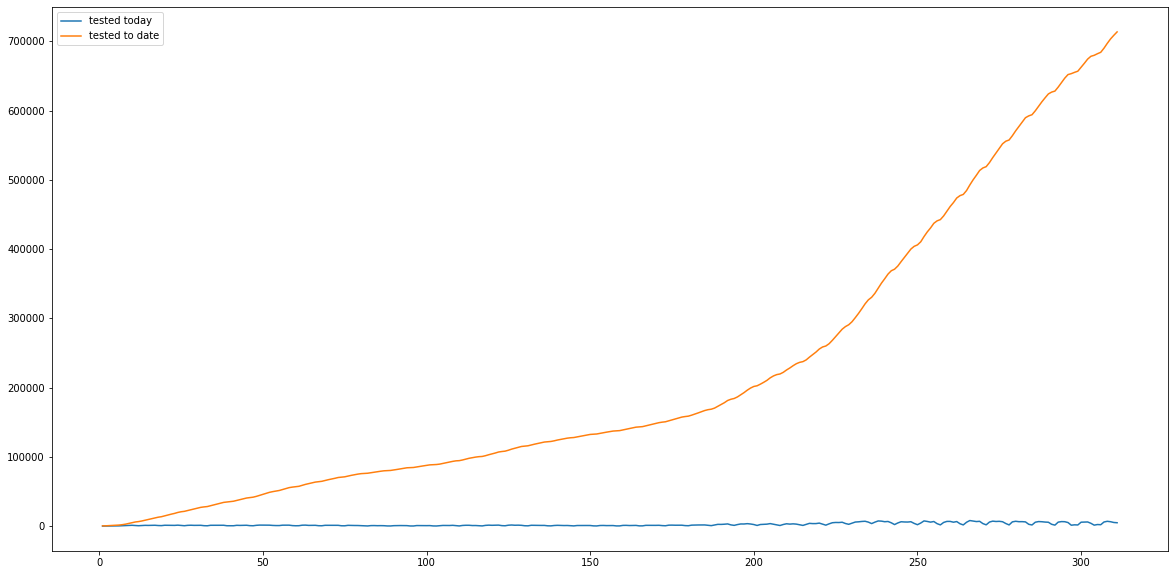

In [342]:
plt.plot(df['dayFromStart'], df['tested_today'], label = "tested today")
plt.plot(df['dayFromStart'], df['tested_to_date'], label="tested to date")
plt.legend()

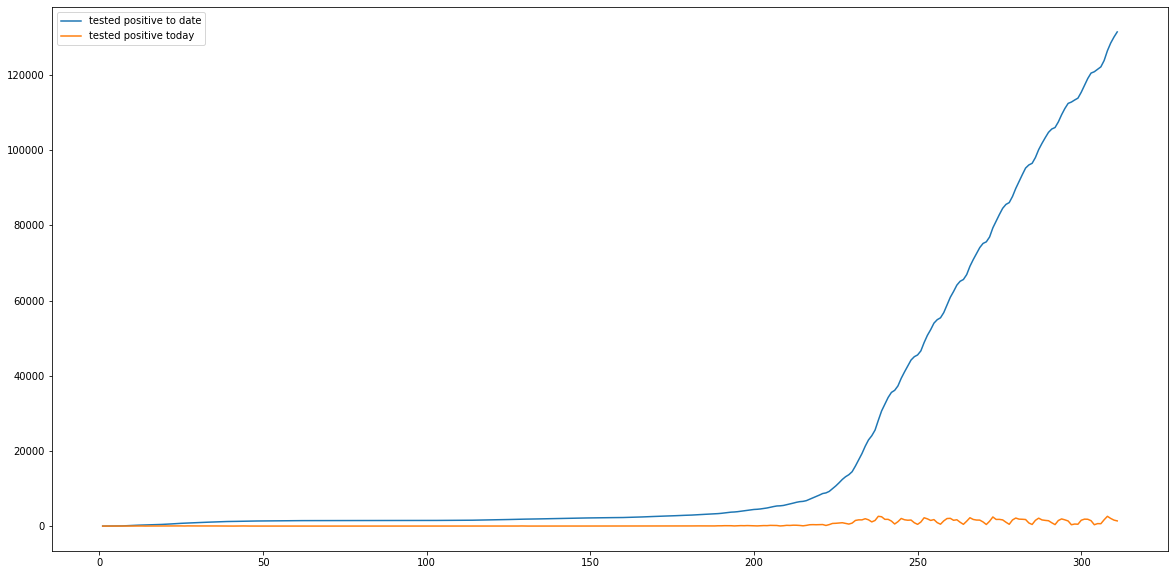

In [343]:
import matplotlib.pyplot as plt
plt.plot(df['dayFromStart'], df['tested_poz_to_date'], label="tested positive to date")
plt.plot(df['dayFromStart'], df['tested_poz_today'], label="tested positive today")
plt.legend()

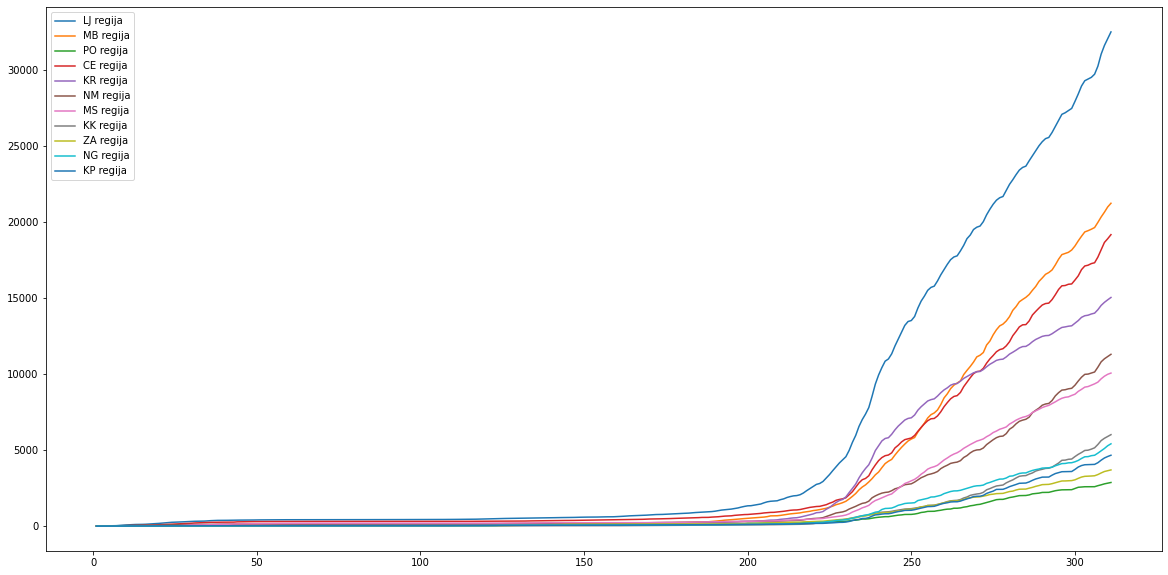

In [344]:
plt.plot(df['dayFromStart'], df['LJ regija'], label="LJ regija")
plt.plot(df['dayFromStart'], df['mb regija'], label="MB regija")
plt.plot(df['dayFromStart'], df['po regija'], label="PO regija")
plt.plot(df['dayFromStart'], df['ce regija'], label="CE regija")
plt.plot(df['dayFromStart'], df['kr regija'], label="KR regija")
plt.plot(df['dayFromStart'], df['nm regija'], label="NM regija")
plt.plot(df['dayFromStart'], df['ms regija'], label="MS regija")
plt.plot(df['dayFromStart'], df['kk regija'], label="KK regija")
plt.plot(df['dayFromStart'], df['za regija'], label="ZA regija")
plt.plot(df['dayFromStart'], df['ng regija'], label="NG regija")
plt.plot(df['dayFromStart'], df['kp regija'], label="KP regija")
plt.legend()


In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

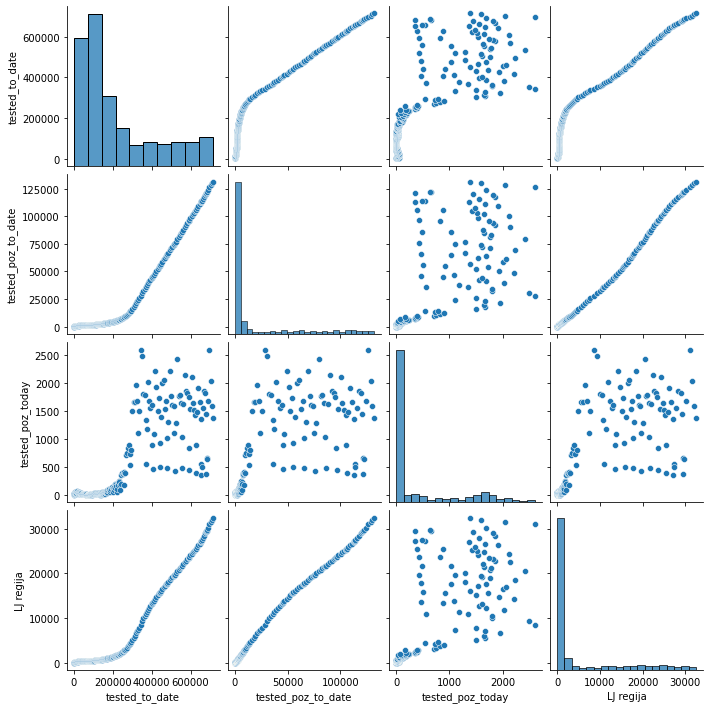

In [346]:
import seaborn as sns
dfPlot=df[['tested_to_date', 'tested_poz_to_date', 'tested_poz_today','LJ regija']].copy()
sns.pairplot(dfPlot)

In [348]:
from sklearn.model_selection import train_test_split

X = df['tested_poz_to_date'].values
Y = df['tested_poz_today'].values
n = len(X)
X = X.reshape((n, 1))
x_train, x_test, y_train, y_test = train_test_split(df['tested_poz_to_date'], df['tested_poz_today'],test_size=0.20, random_state=0)
reg = LinearRegression()
reg = reg.fit(X, Y)

In [349]:
Y_pred = reg.predict(X)
mse = mean_squared_error(Y, Y_pred)
r2_score = reg.score(X, Y)

In [350]:
print(np.sqrt(mse))
print(r2_score)

442.13820564927045
0.5809934120312736


In [351]:
print(reg.predict([[139270]]))

[2103.03188974]


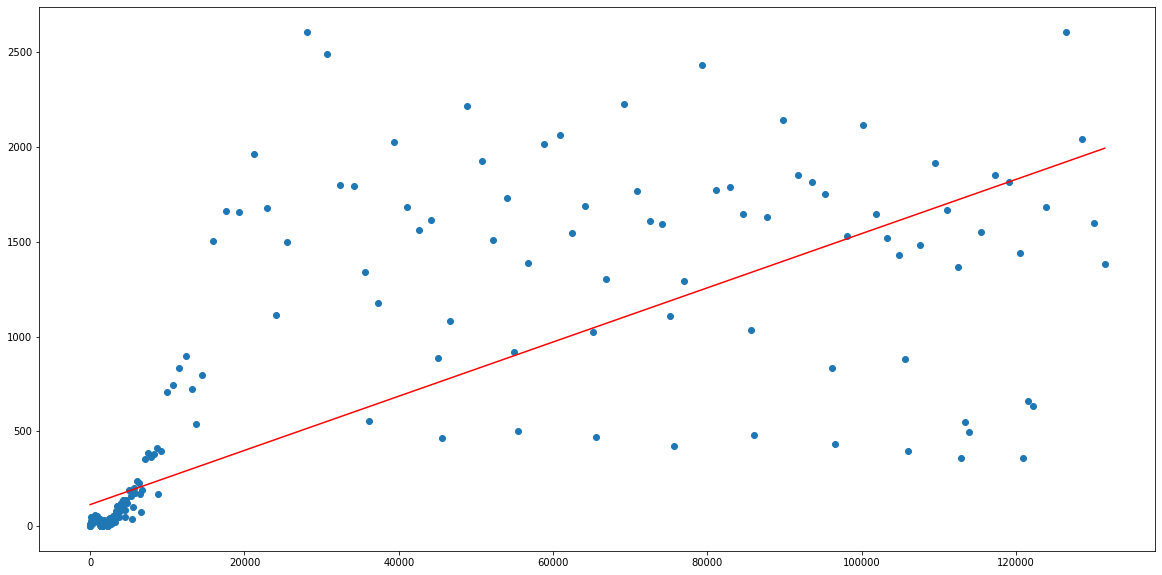

In [352]:
plt.scatter(X,Y)
plt.plot(X, Y_pred, color="red")
plt.show()